## Zadania

1. Zbuduj model używając tylko jednej zmiennej dla pozostałych atrybutów i wybierz ten, który uzyskuje najlepsze wyniki pomiaru jakości regresji. Następnie porównaj najlepiej działający model z regresją wyuczoną na wszystkich zmiennych objaśniających.

## Przygotowanie danych

In [1]:
import pandas as pd # Feature Engineering
import numpy as np # Do numerycznych operacji na macierzach i wektorach

# Do wizualizacji danych
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression # Konstruktor modelu regresji liniowej
from sklearn.model_selection import train_test_split # Funkcja do podziału danych na treningowe i testowe
from sklearn.metrics import mean_squared_error # Funkcja do obliczania MSE (Błędu średniokwadratowego)
# from sklearn import datasets

In [2]:
data = pd.read_csv('../Dane/diabetes.csv')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
print(f"Lista atrybutów: {data.columns.to_list()[:-1]}") # Lista atrybutów
print(f"Zmienna zależna: {data.columns[-1]}") # Zmienna zależna / modelowana

Lista atrybutów: ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
Zmienna zależna: Y


In [4]:
# Wymiary dataframe'a
rows, columns = data.shape
print(f'Dataframe o wymiarach: {rows} wierszy oraz {columns} kolumn')

Dataframe o wymiarach: 442 wierszy oraz 11 kolumn


In [5]:
data.isnull().values.any() # Sprawdza czy w dataframe znajduje się dowolna pusta wartość

np.False_

In [6]:
corr = data.corr()
corr # Dataframe korelacji - Trudny do wglądu zwłaszcza w przypadku dużej ilości danych

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Axes: >

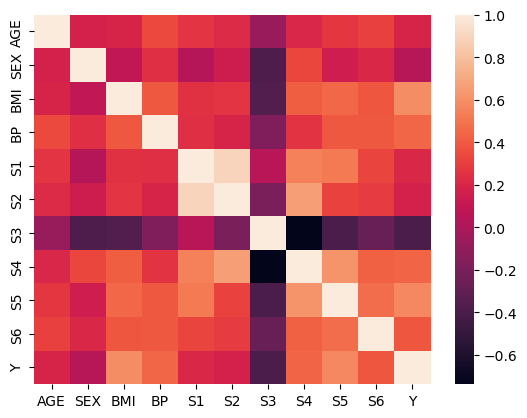

In [7]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index) # Przydatny sposób do wizualizacji korelacji między atrybutami i etykietami

In [8]:
dataset = data.iloc[:,:-1] # Wyodrębnienie danych z samymi atrybutami
dataset.columns.to_list()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

# Trenowanie modelu

### Model regresyjny - wszystkie atrybuty

In [9]:
# Podział danych na treningowe 80% i testowe 20%
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(dataset, data.Y, test_size=0.2, random_state=0)

In [10]:
all_model = LinearRegression() # Stworzenie obiektu modelu
all_model.fit(X_train_all, y_train_all) # Uczenie modelu na danych treningowych

all_r_score = all_model.score(X_test_all, y_test_all) 
all_r_score # Weryfikacja modelu na danych testowych -> Zwraca r^2 - wyznacznik dopasowania modelu do danych

0.3322332173106173

In [13]:
all_model_predicted = all_model.predict(X_test_all) # Zwraca ndarray z przewidzianymi wartościami
all_model_mse = mean_squared_error(all_model_predicted, y_test_all)
all_model_mse # MSE - Błąd średniokwadratowy -> Wyższa wartość oznacza gorszy wynik dla modelu

3424.2593342986975

In [40]:
# Punkt przecięcia prostej z osią Y -> Przewidywana domyślna wartość w wypadku gdy nasze cechy są równe 0
all_model.intercept_

np.float64(-308.75000596284633)

In [52]:
coeff = all_model.coef_
labels = list(X_train_all.columns)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,-0.129138,-23.178923,6.065521,1.051665,-0.911848,0.507625,0.091116,6.285182,66.693161,0.178239


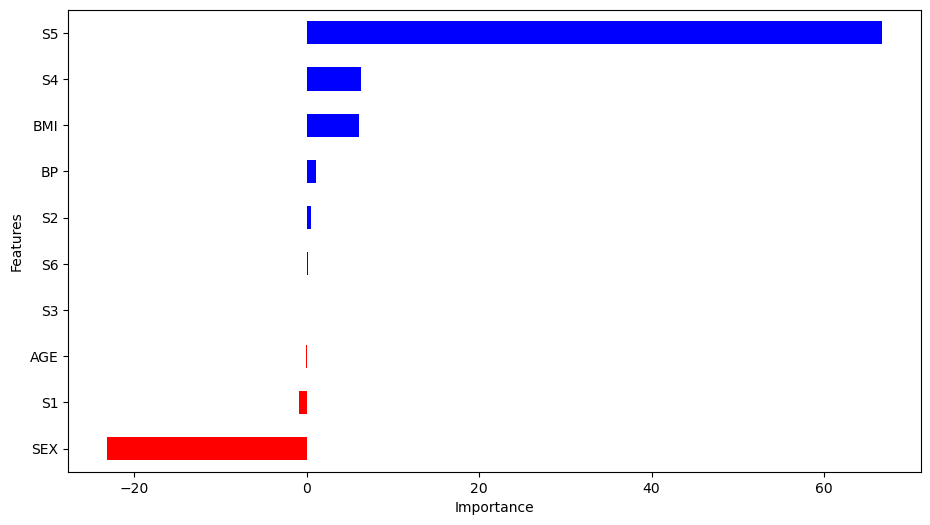

In [55]:
# Wizualizacji współczynników zmiennych
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = list(coeff)
features.sort_values(by='importance', ascending=True, inplace=True)
features['positive'] = features.importance > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6), color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

# Współczynnik zmiennych -> Jak każda jedna jednostka wpływa na wynik zmiennej zależnej
all_model_coef = pd.DataFrame([coeff], columns=labels)
all_model_coef

### Model regresyjny - Jeden atrybut

In [61]:
X_train_task, X_test_task, y_train_task, y_test_task = train_test_split(dataset[['S5']], data.Y, test_size=0.2, random_state=0)

task_model = LinearRegression()
task_model.fit(X_train_task, y_train_task)
task_r_score = task_model.score(X_test_task, y_test_task)

task_predicted = task_model.predict(X_test_task)
task_model_mse = mean_squared_error(task_predicted, y_test_task)

# S5: r^2 = 0.19787113965189784, MSE =  4113.258264053267
# S4: r^2 = 0.1088686553962428, MSE = 4569.656508752965
# BMI: r^2 = 0.19057346847560142, MSE = 4150.6801893299835
# BP: r^2 = 0.18725935383524017, MSE = 4167.674727372873
# S6: r^2 =  0.14792764300640981, MSE = 4369.364870445186

# Wysoki współczynnik zmiennych nie zawsze przekłada się na lepszy wynik modelu predykcyjnego

### Porównywanie modeli - Jeden atrybut vs wszystkie atrybuty

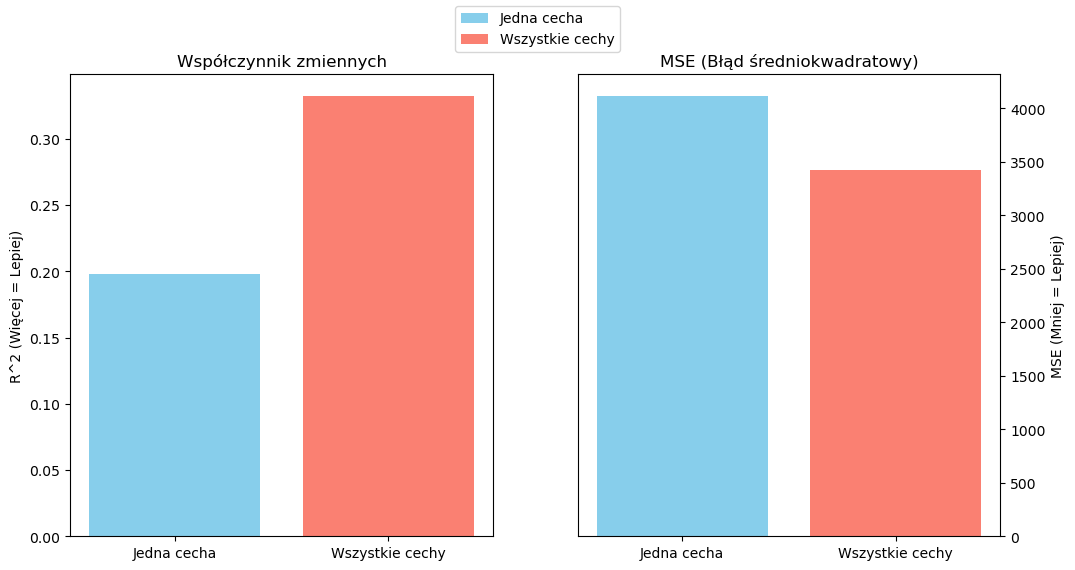

In [114]:
df_compare = pd.DataFrame([[task_r_score, task_model_mse],[all_r_score, all_model_mse]], columns=['R^2', 'MSE'], index=['Jedna cecha', 'Wszystkie cechy'])
df_compare

#df_compare['R^2'].plot.bar()
colors = ['skyblue', 'salmon']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1 = axes[0].bar(df_compare.index, df_compare['R^2'], color=colors)
axes[0].set_title('Współczynnik zmiennych')
axes[0].set_ylabel('R^2 (Więcej = Lepiej)')

axes[1].bar(df_compare.index, df_compare['MSE'], color=colors)
axes[1].set_title('MSE (Błąd średniokwadratowy)')
axes[1].set_ylabel('MSE (Mniej = Lepiej)')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()

fig.legend([ax1[0], ax1[1]], ['Jedna cecha', 'Wszystkie cechy'], loc='upper center')
plt.show()
plt.close()

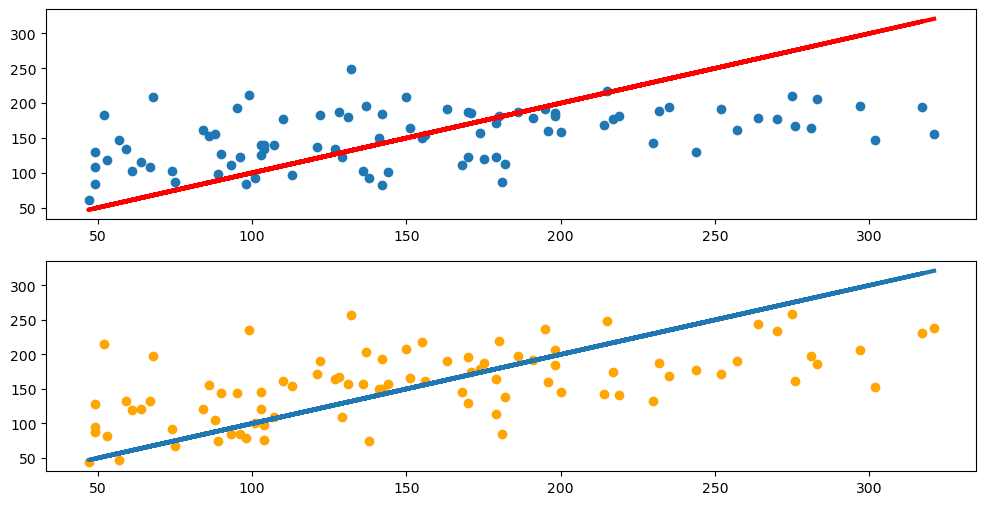

In [129]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

axes[0].scatter(y_test_task, task_predicted)
axes[0].plot(y_test_task, y_test_task, color='red', linewidth=3)

axes[1].scatter(y_test_all, all_model_predicted, color='orange')
axes[1].plot(y_test_all, y_test_all, linewidth=3)

plt.show()
plt.close()